<a href="https://colab.research.google.com/github/Renator12/Star-prediction/blob/main/starpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload=files.upload()

Saving 6 class csv.csv to 6 class csv.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('6 class csv.csv')
df.loc[15]

Temperature (K)             3340
Luminosity(L/Lo)          0.0038
Radius(R/Ro)                0.24
Absolute magnitude(Mv)     13.07
Star type                      1
Star color                   Red
Spectral Class                 M
Name: 15, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
df['Star color'].value_counts()
map={'Blue White':'Blue-white','Blue-White':'Blue-white','Yellowish-white':'yellow-white','Yellowish White':'yellow-white','White':'white','yellowish':'Yellowish','Blue white':'Blue-white',}
df.replace({'Star color':map},inplace=True)
df['Star color'].value_counts()


Red                   112
Blue                   55
Blue-white             40
yellow-white           11
white                  10
Yellowish               3
Whitish                 2
Orange                  2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Orange-Red              1
Blue white              1
Name: Star color, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


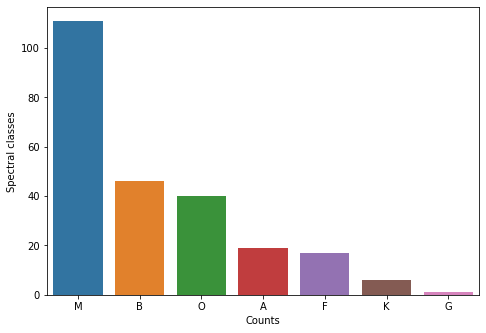

In [ ]:
fig=plt.figure()
axes=fig.add_axes([0.5,0.5,1,1])
axes.set_xlabel('Counts')
axes.set_ylabel('Spectral classes')
vals1=df['Spectral Class'].value_counts()
sns.barplot(vals1.index,vals1.values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


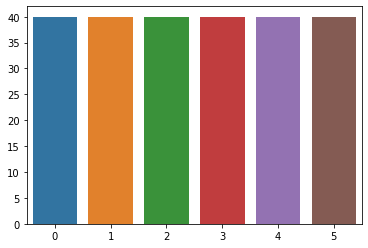

In [ ]:
vals1=df['Star type'].value_counts()
sns.barplot(vals1.index,vals1.values)

This data matches with the predictions of most astronomers that the maximum number of stars happen to be of kind M which also happen to be the coolest stars. Also,the target class '**STAR TYPE'** is balanced which makes it ideal for machine learning algorithms to predict given the quality of the dataset. 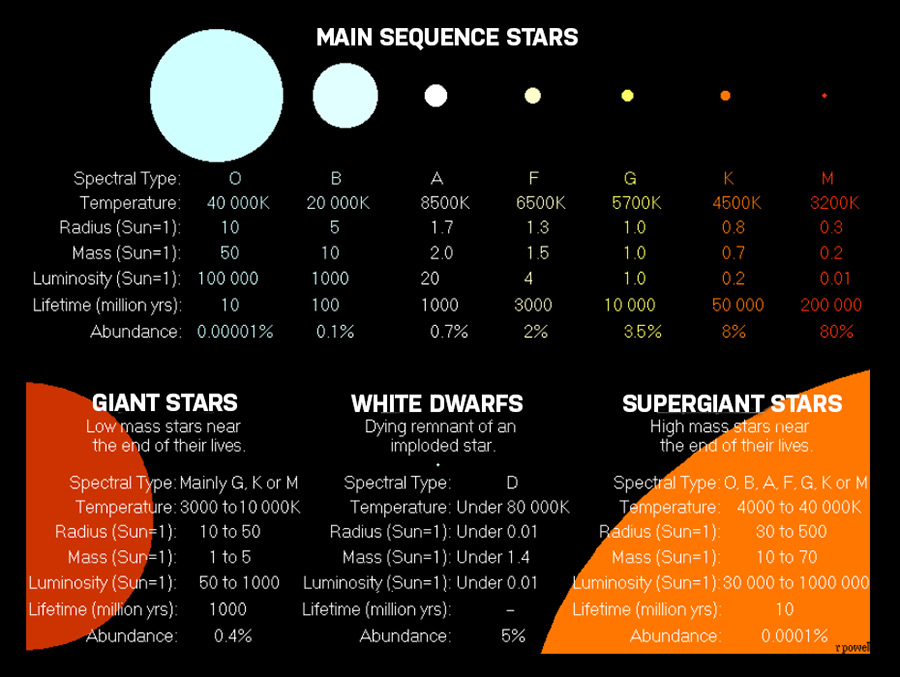

> Indented block



---



In [ ]:
df.isna().count() #no empty values

Temperature (K)           240
Luminosity(L/Lo)          240
Radius(R/Ro)              240
Absolute magnitude(Mv)    240
Star type                 240
Star color                240
Spectral Class            240
dtype: int64

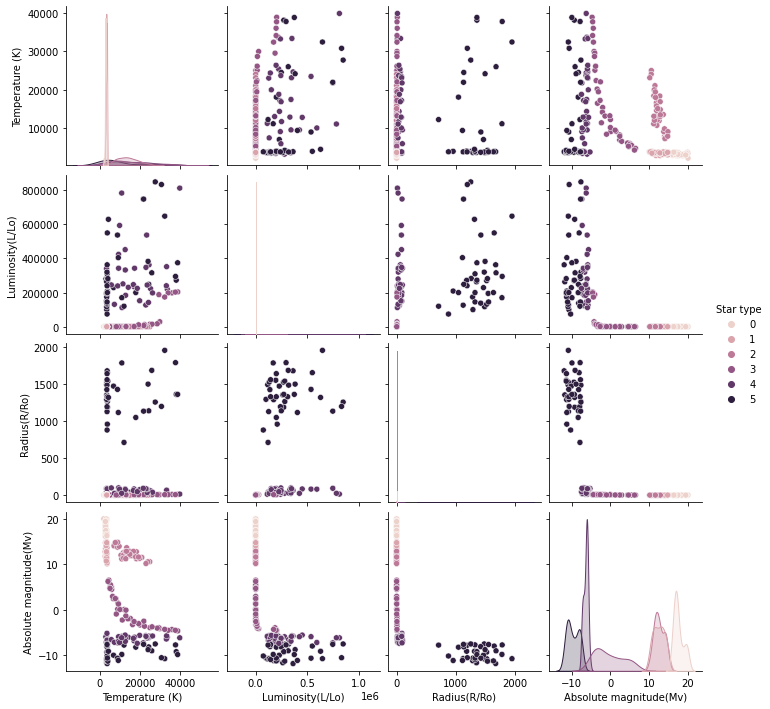

In [ ]:
sns.pairplot(data=df,hue='Star type')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


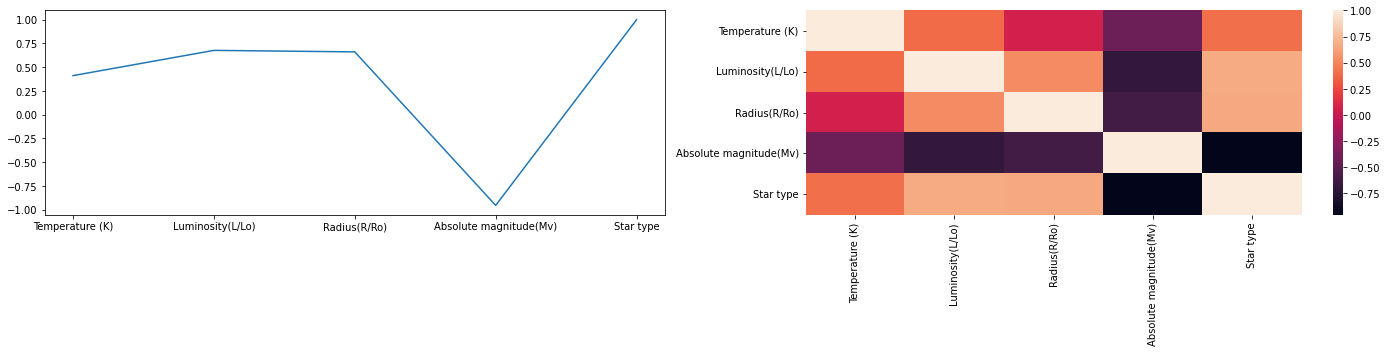

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=[20,5])
data=df.corrwith(df['Star type'])
data2=df.corr()
sns.lineplot(data.index,data.values,ax=axes[0])
sns.heatmap(data2,ax=axes[1])
fig.tight_layout()

The correlation metrics prove that there lies a heavy negative relationship between the absolute magnitutde and the star type.This can be very useful for predictions as we can put a heavier emphasis on this metric compared to others.
The absolute magnitude of a star, M is the magnitude the star would have if it was placed at a distance of 10 parsecs from Earth.It is calculated as
m-M=5log(d/10) where **m** is the apparent magnitutde,**M** is the absolute magnitutde and **d** is the distance between the star and earth.The H-R diagram shows the relationships between the absolute magnitutdes and the spectral types which is frequently used in classifying stars.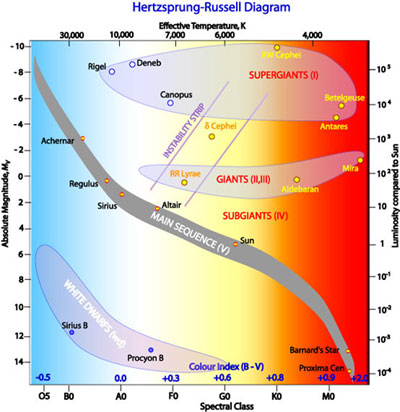


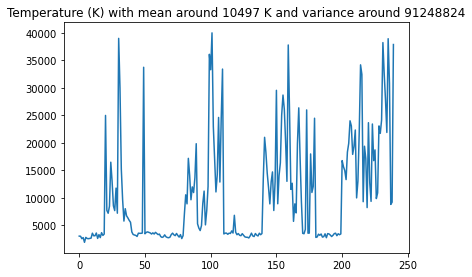

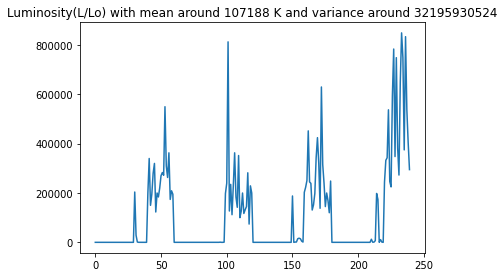

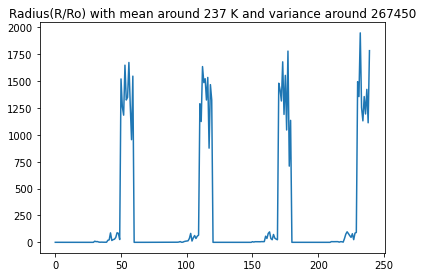

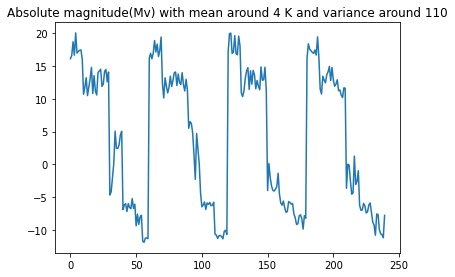

In [ ]:
numericolumns=df.drop(columns=['Star type','Star color','Spectral Class'])
for values in numericolumns:

  fig=plt.figure()
  axes=fig.add_axes([0.2,0.2,0.8,0.8])
  df[values].plot()
  axes.set_title(f"{values} with mean around {int(df[values].mean())} K and variance around {int(df[values].var())}")
  

  plt.show()

There seems to massive variances around the data surrounding the stars and can affect out machine learning algorithms negatively.This data needs to be scaled appropriately and the min-max scaler r will be used.The boxplots below show that there are massive numbers of outliers in this distribution since stars vary in astronomical units in themselves.The min-max scaler preserves the shape of the distribution while converting the range from [0,1].This is the perfect scaler for this situation.

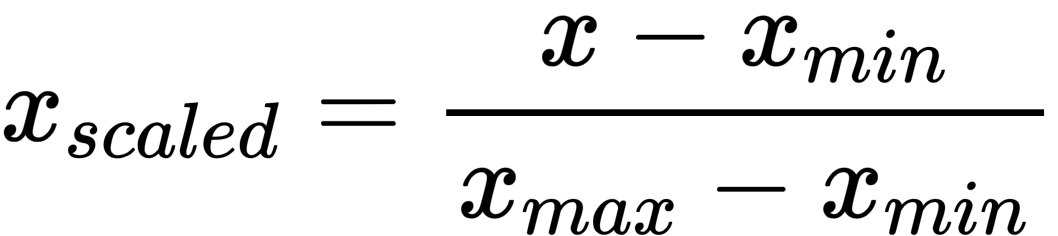 

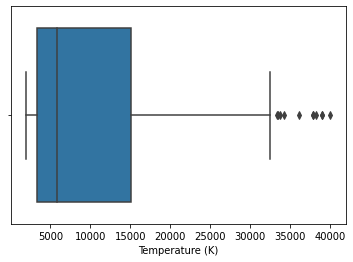

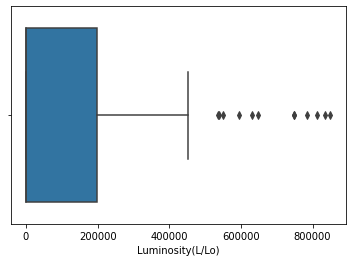

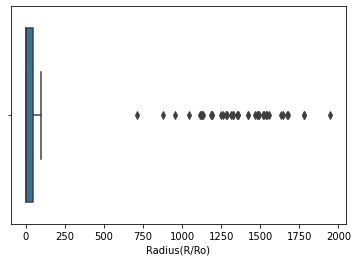

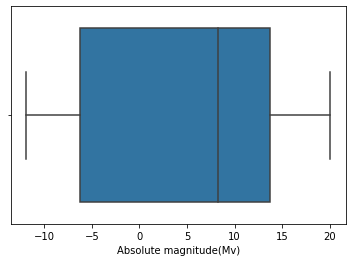

In [ ]:
for values in numericolumns:
  fig=plt.figure()
  sns.boxplot(x=df[values])

The data needs to be transformed accordingly to fit to a machine learning model.1)The categorical data does not have any ordinal encoding relationship and hence it will be best to use one hot encoding for the dataset.

2)The target class will be removed from the x-train and x-test parts and will be the labels instead.The model will predict the Star type based on this .

3)The minxmax scaler will scale the data to the appropriate range to feed the model



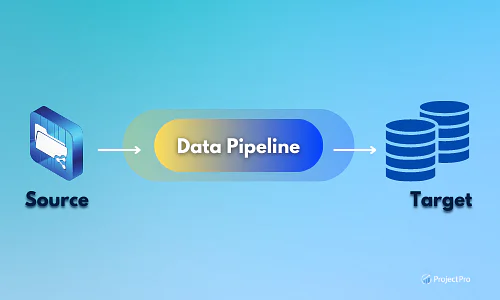

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numericolumns=list(numericolumns)
catcolumns=list((set(df.columns)-set(numericolumns)))
catcolumns.remove('Star type')
def transform(dataframe1):
  modelencoder=OneHotEncoder()
  modelscaler=MinMaxScaler()
  full_pipe=ColumnTransformer([('num',modelscaler,numericolumns),('catcolumns',modelencoder,catcolumns)])
  if 'Star type' in dataframe1:
    return (full_pipe.fit_transform(dataframe1.drop(columns='Star type')),full_pipe)
  else:
    return (full_pipe.fit_transform(dataframe1),full_pipe)
def labelsfunc(dataframe1):
  return pd.get_dummies(df['Star type'])

In [ ]:
scaled_data=transform(df)[0]
labels=labelsfunc(df)
scaled_data

<240x24 sparse matrix of type '<class 'numpy.float64'>'
	with 1436 stored elements in Compressed Sparse Row format>

In [ ]:
new_df = labels.idxmax(axis=1) #reversing one hot encoding(for later in the webapp)
new_df

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Length: 240, dtype: int64

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels, test_size=0.33, random_state=42)
 X_test[0]

<1x24 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
#clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred2=clf.predict(X_test)
#rnf=RandomForestClassifier(n_estimators=200,max_leaf_nodes=16)
rnf.fit(X_train,y_train)
y_pred=rnf.predict(X_test)



In [ ]:
kfoldvalid = KFold(n_splits=5)
kfoldvalid.split(X_train)
for i, (x, y) in enumerate(kfoldvalid.split(X_train)):
  print(f'The {i}th index kfold is')
  
  print(x)
  print(y)

The 0th index kfold is
[ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
The 1th index kfold is
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 1

In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
for c,vals in enumerate(scores):
  print(f"The cross validation score for fold {c} is {vals*100}%")

The cross validation score for fold 0 is 96.875%
The cross validation score for fold 1 is 100.0%
The cross validation score for fold 2 is 100.0%
The cross validation score for fold 3 is 100.0%
The cross validation score for fold 4 is 96.875%


In [ ]:
predictions = y_pred2.argmax(axis=1)

test_labels=y_test.idxmax(axis=1)

print(confusion_matrix(test_labels.values,predictions))

[[16  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 16]]


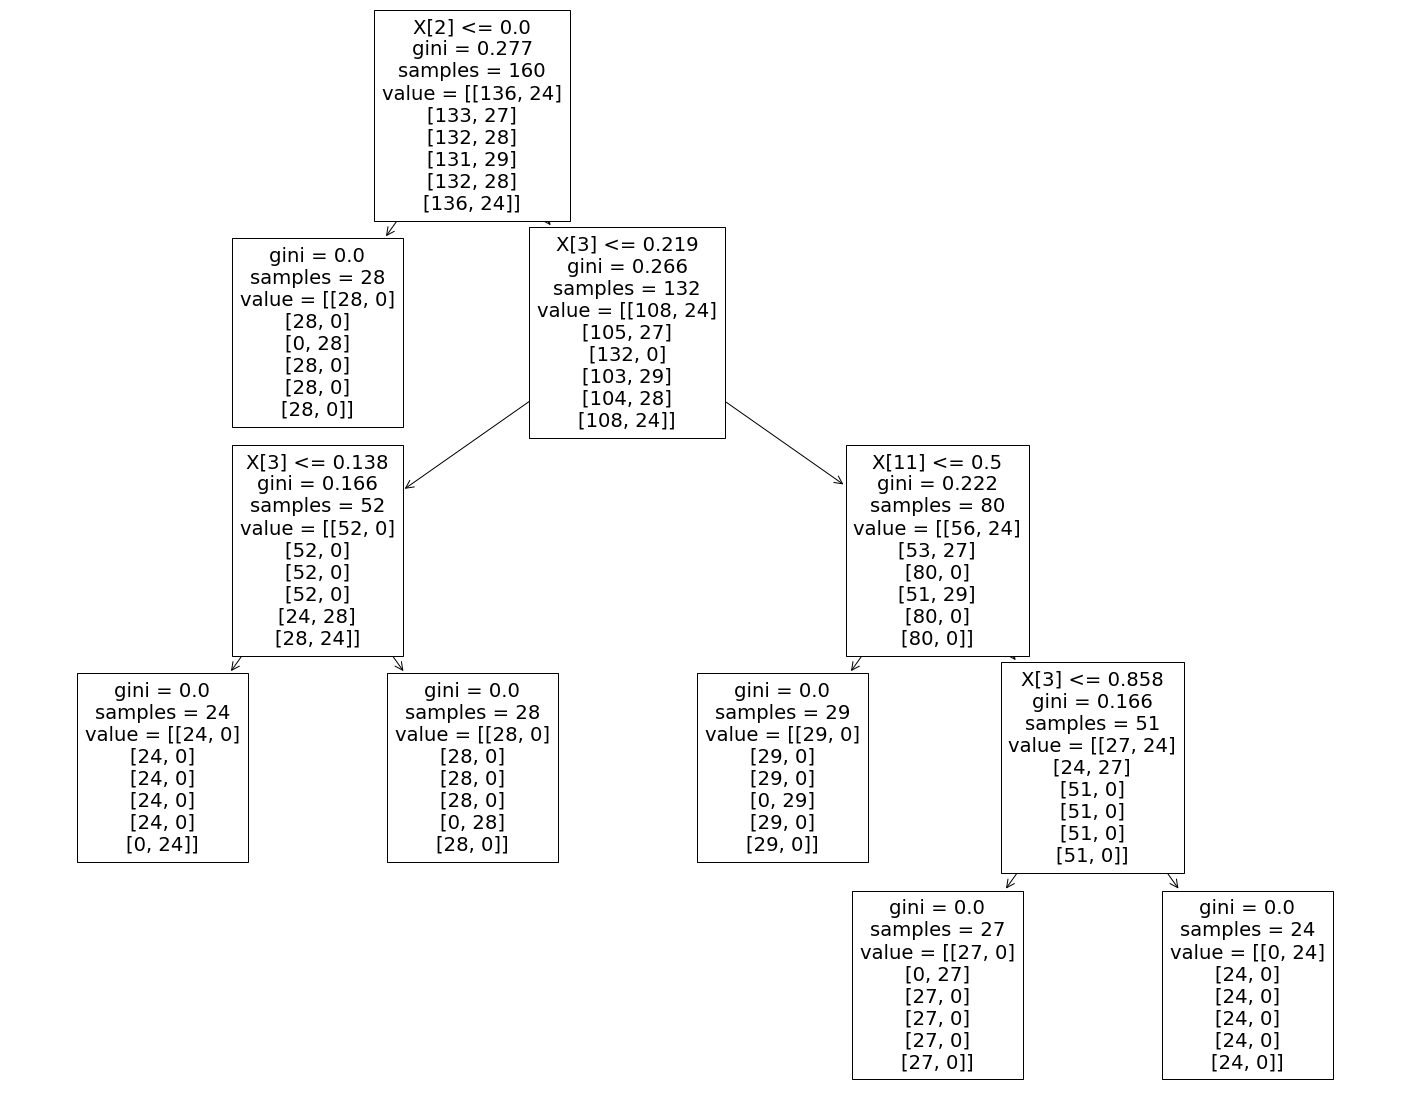

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf)

In [ ]:
def convertpredtostring(pred):
  map={0:"RED DWARF",1:"BROWN DWARF",2:"WHITE DWARF",3:"MAIN SEQUENCE",4:"SUPERGIANT",5:"HYPERGIANT"}
  return map[pred]
  

In [ ]:

print(classification_report(test_labels.values,predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        16

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
import numpy as np


In [ ]:
dfsample=pd.DataFrame(columns=df.columns) #trying out sample values
dfsample.drop(columns='Star type',inplace=True)
arr=np.array([5000,0.0038,0.24,18,'Red','M'])#user input
dfsample.loc[0]=arr
a=transform(df)[1]
val=a.transform(dfsample)
g=rnf.predict(val).argmax()
print('prediction is ',convertpredtostring(g))

prediction is  RED DWARF


In [ ]:
import pickle
pickle.dump(rnf, open('model.pkl', 'wb'))
